# Maximum and minimum temperatures in Mexico city 
## Description:
In this project I would show the process of the data looking, data cleaning and data visualitzation (a little of analysing)
My objective will be to show something like the image under this, but with the data of the Mexico city. This was a Project that I got 
by doing an assignment in the *Applied Plotting, Charting & Data Representation in Python* in Cousera from the University of Michigan.
![Pic](assets/chris_sketch.png)

The data was obtained from [Global Historical Climatology Network daily (GHCNd)](https://www.ncei.noaa.gov/products/land-based-station/global-historical-climatology-network-daily).

In [ ]:
# Let's first import the libraries that I would use 
import pandas 

In [161]:
# Now, let's see how the data look
#In this dataframe we have the highest temperatures and the lowest temperatues from each day in Mexico City, and some extra data
df = pd.read_csv('mex temps.csv')
df

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2000-01-04,25.5,",,S",8.5,",,S"
1,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2000-01-06,NaN,NaN,NaN,NaN
2,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2000-01-11,22.7,",,S",8.4,",,S"
3,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2000-01-12,23.0,",,S",8.3,",,S"
4,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2000-01-14,22.3,",,S",6.8,",,S"
...,...,...,...,...,...,...,...,...,...,...
5611,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2024-06-07,32.6,",,S",17.0,",,S"
5612,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2024-06-08,32.0,",,S",17.0,",,S"
5613,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2024-06-09,NaN,NaN,NaN,NaN
5614,MXM00076680,"MEXICO CITY, MX",19.4,-99.183,2303.0,2024-06-10,29.5,",,S",15.6,",,S"


In [162]:
#We are only going to use the TMAX and the TMIN, so let's just keep the columns that we will need
df.drop(columns = ['NAME','LATITUDE','LONGITUDE', 'ELEVATION','TMAX_ATTRIBUTES','TMIN_ATTRIBUTES' ], inplace = True)


In [164]:
# Now its much better
#The data it is supposed to be from the 2000 to the 2024, but the 2024 its not ended now(today I am still in June)
#So let's only take the dates from 2000-2023
# Additionaly, let's change the type to datetime, which makes things easier
df['DATE'] = pd.to_datetime(df['DATE'])
df = df.sort_values(by = 'DATE')
df = df[(df['DATE'].dt.year <= 2023)]
df

,STATION,DATE,TMAX,TMIN
0,MXM00076680,2000-01-04,25.5,8.5
1,MXM00076680,2000-01-06,NaN,NaN
2,MXM00076680,2000-01-11,22.7,8.4
3,MXM00076680,2000-01-12,23.0,8.3
4,MXM00076680,2000-01-14,22.3,6.8
...,...,...,...,...
5455,MXM00076680,2023-12-27,NaN,NaN
5456,MXM00076680,2023-12-28,NaN,NaN
5457,MXM00076680,2023-12-29,22.7,5.0
5458,MXM00076680,2023-12-30,21.6,5.6


In [165]:
#It's clear that there are some NaN so let's drop those values
df.dropna(inplace = True)
df

,STATION,DATE,TMAX,TMIN
0,MXM00076680,2000-01-04,25.5,8.5
2,MXM00076680,2000-01-11,22.7,8.4
3,MXM00076680,2000-01-12,23.0,8.3
4,MXM00076680,2000-01-14,22.3,6.8
7,MXM00076680,2000-01-20,19.9,4.5
...,...,...,...,...
5452,MXM00076680,2023-12-24,23.4,7.2
5453,MXM00076680,2023-12-25,23.2,10.0
5454,MXM00076680,2023-12-26,23.4,10.0
5457,MXM00076680,2023-12-29,22.7,5.0


In [166]:
# Now we want to compare each day and month for each year so let's take each month and day to later use a groupby
df['Month'] = df['DATE'].dt.strftime('%m')
df['Day'] = df['DATE'].dt.strftime('%d')


In [167]:
#And just to be sure let's drop if there is data from 29-feb, to avoid problems
df = df[~((df['DATE'].dt.day == 29) & (df['DATE'].dt.month == 2))]


In [168]:
# Lets also prepare another df of the temperatures of 2023 to further see the temperatures that are more extreme than others
df22 = df[df['DATE'].dt.year > 2022]
df_min_22 = df22.drop(columns = 'TMAX')
df_max_22 = df22.drop(columns = 'TMIN')

df_max_22_groupped =df_max_22.groupby(['Month','Day']).max().reset_index()
df_min_22_groupped =df_min_22.groupby(['Month','Day']).min().reset_index()


In [169]:
#Now lets also separate the min temperatures and the max ones
df_max_groupped =df.groupby(['Month','Day']).max().reset_index()
df_min_groupped =df.groupby(['Month','Day']).min().reset_index()


In [170]:
# Now we have 2 dataframes, each with the MINS and MAX, to avoid confusions let's drop the other columns in each dataframe
df_max_groupped.drop(columns = 'TMIN', inplace = True)
df_min_groupped.drop(columns = 'TMAX', inplace = True)

In [171]:
#Here we can see it
print(df_max_groupped.head())
print(df_min_groupped.head())

  Month Day      STATION       DATE  TMAX
0    01  01  MXM00076680 2023-01-01  24.5
1    01  02  MXM00076680 2023-01-02  25.5
2    01  03  MXM00076680 2023-01-03  25.6
3    01  04  MXM00076680 2023-01-04  26.5
4    01  05  MXM00076680 2023-01-05  26.1
  Month Day      STATION       DATE  TMIN
0    01  01  MXM00076680 2018-01-01   7.5
1    01  02  MXM00076680 2015-01-02   4.2
2    01  03  MXM00076680 2014-01-03   5.6
3    01  04  MXM00076680 2000-01-04   5.6
4    01  05  MXM00076680 2012-01-05   5.5


In [172]:
# Now lets compare the temperatures to get the ones from 2023 that are extrem(higjer or lower than the other years)
df_max_groupped_aligned = df_max_groupped.reindex(df_max_22_groupped.index)
df_min_groupped_aligned = df_min_groupped.reindex(df_min_22_groupped.index)

val_max = df_max_22_groupped[(df_max_22_groupped['TMAX'] > df_max_groupped_aligned['TMAX'])]
val_min = df_min_22_groupped[(df_min_22_groupped['TMIN'] < df_min_groupped_aligned['TMIN'])]

In [173]:
#Lets also prepare the Ticks for the x-axis
xticks = (pd.date_range('1/1/2001','31/12/2001', freq = 'M') - pd.offsets.Day(1) + pd.offsets.Day(1)).strftime('%-j').astype(int)
xticks

Int64Index([31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334, 365], dtype='int64')

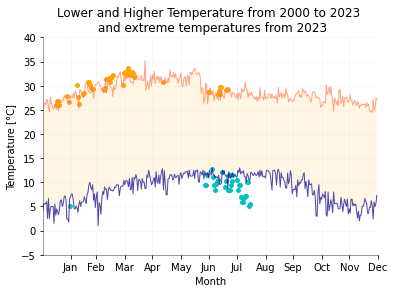

In [176]:
# Now we can finally start to do the plot
import matplotlib.pyplot as plt
from calendar import month_abbr
plt.figure()  


ax1 = plt.gca() 

#First le's plot the min and max temperatures each with a representative color

ax1.plot(df_min_groupped['TMIN'], '-',color ='darkblue', alpha = 0.7,  linewidth=1)
ax1.plot(df_max_groupped['TMAX'],'-', color ='coral', alpha = 0.7,  linewidth=1)

# Now let's fill the moddle of this
ax1.fill_between(df_min_groupped.index, 
                       df_min_groupped['TMIN'], df_max_groupped['TMAX'], 
                       facecolor='papayawhip', 
                       alpha=0.60)

#Lets plot the extreme temperatures
plt.scatter(val_max.index,val_max['TMAX'], color = 'orange', s = 15)
plt.scatter(val_min.index,val_min['TMIN'], color = 'c', s = 15)

#The tick now
ax1.set_xlim(1,365)
ax1.set_xticks(xticks)
ax1.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct',
       'Nov', 'Dec'], alpha = 1)

#Tittle
ax1.set_title('''Lower and Higher Temperature from 2000 to 2023 \n and extreme temperatures from 2023''')

# Now let's put the ylabels
ax1.set_ylim(-5,40)
yticks = pd.Series(range(-0,50,5))
ax1.set_xlabel('Month', alpha = 1)
ax1.set_ylabel('Temperature [°C]' , alpha = 1)

#Some visual things
ax1.grid(True, alpha = 0.1)

# invisible Frame
for spine in ax1.spines:
    ax1.spines[spine].set_visible(False)
    
ax1.spines['bottom'].set_visible(True)
ax1.spines['bottom'].set_alpha(0.5)
ax1.spines['left'].set_visible(True)
ax1.spines['left'].set_alpha(0.5)
plt.show()

*To conclude just a little analysis. As we were expecting in summer we have higher temperatures than in autumn and winter.*
*And in winter we have lower. Another thing to notice is that the most part of the extreme temperatures are compressed in*
*Summer for lower temperatures and it's a little bit more scattered for higher but tend to be in the first part of the year*